In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import numpy as np


In this code we explore the distribution of the labeled data (both curated and noisy) collected with the active leanring procedure.

Number of samples: 
 Clean data: 2092
 Noisy data: 4974
Number of unique labels: 33


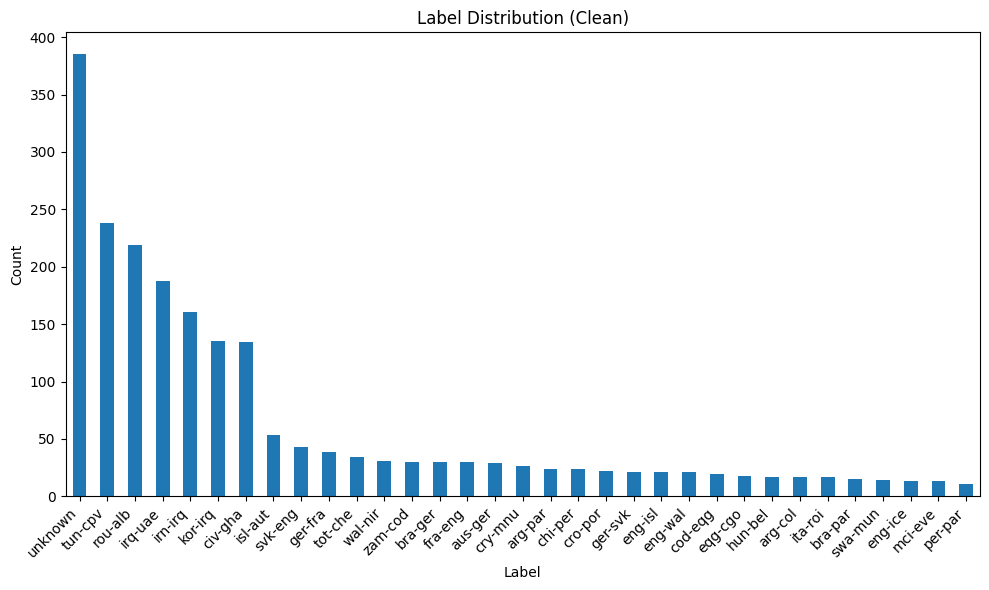

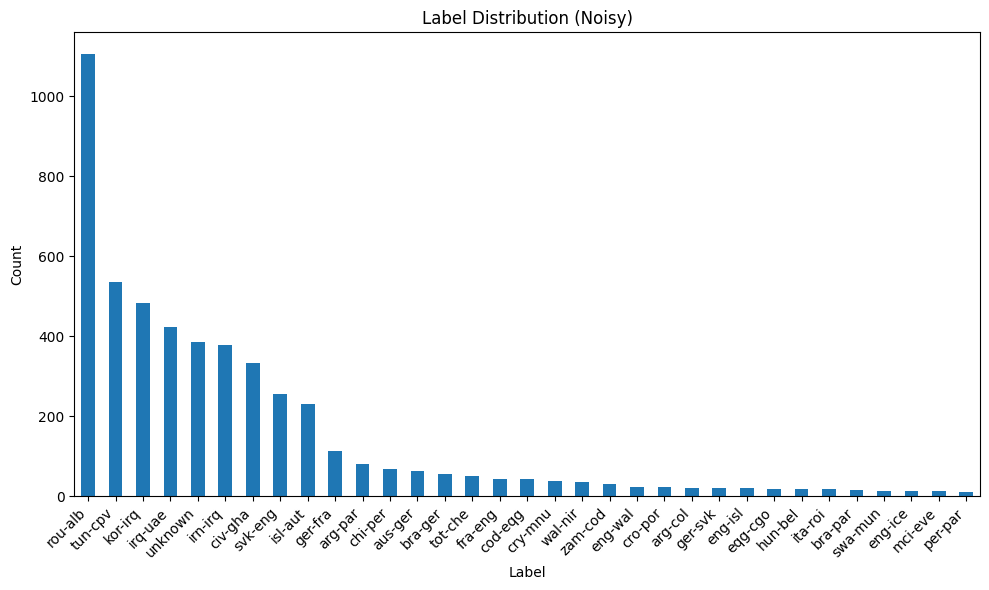

In [3]:
df = pd.read_csv('final_labeled_data.csv')
df_noisy = pd.read_csv('noisy_labeled_data.csv')

num_samples = len(df)
num_samples_noisy = len(df_noisy)
unique_labels = df['label'].nunique()

label_distribution = df['label'].value_counts()
label_distribution_noisy = df_noisy['label'].value_counts()

print(f"Number of samples: \n Clean data: {num_samples}\n Noisy data: {num_samples_noisy}")
print(f"Number of unique labels: {unique_labels}")

plt.figure(figsize=(10, 6))
label_distribution.plot(kind='bar')
plt.title('Label Distribution (Clean)')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 6))
label_distribution_noisy.plot(kind='bar')
plt.title('Label Distribution (Noisy)')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Distribution is similar, on the noisy df we have less unknowns and too many samples in the rou-alb class, suggesting that that class might be very noisy. 

We start with the clean data and consider only classes that have at least 100 samples.

In [ ]:
selected_labels = pd.read_csv('selected_labels.csv')

class_counts = df['label'].value_counts()
valid_classes = class_counts[class_counts >= 100].index
df_filtered = df[df['label'].isin(valid_classes)]

df_filtered['image_id'] = df_filtered['image_path'].str.extract(r'(\d+)').astype(int)
selected_labels = selected_labels.drop(columns=['Ball', 'Gate', 'referee Image'])
selected_labels = selected_labels.rename(columns={'Image Number': 'image_id'})

merged = pd.merge(df_filtered, selected_labels, on='image_id', how='inner')

known = merged[merged['label'] != 'unknown']
unknown = merged[merged['label'] == 'unknown']

label_columns = selected_labels.columns.drop('image_id')
known_props = known[label_columns].mean()
unknown_props = unknown[label_columns].mean()

comparison = pd.DataFrame({
    'Known': known_props,
    'Unknown': unknown_props
})

print(comparison)


                           Known   Unknown
Start/Restar the game   0.029767  0.070130
The joy of the players  0.042791  0.215584
yellow card             0.030698  0.080519
Red Card                0.000000  0.012987
Stadium View            0.181395  0.374026
Penalty Image           0.106977  0.049351
Free Kick               0.404651  0.098701
Generic Moment          0.203721  0.098701


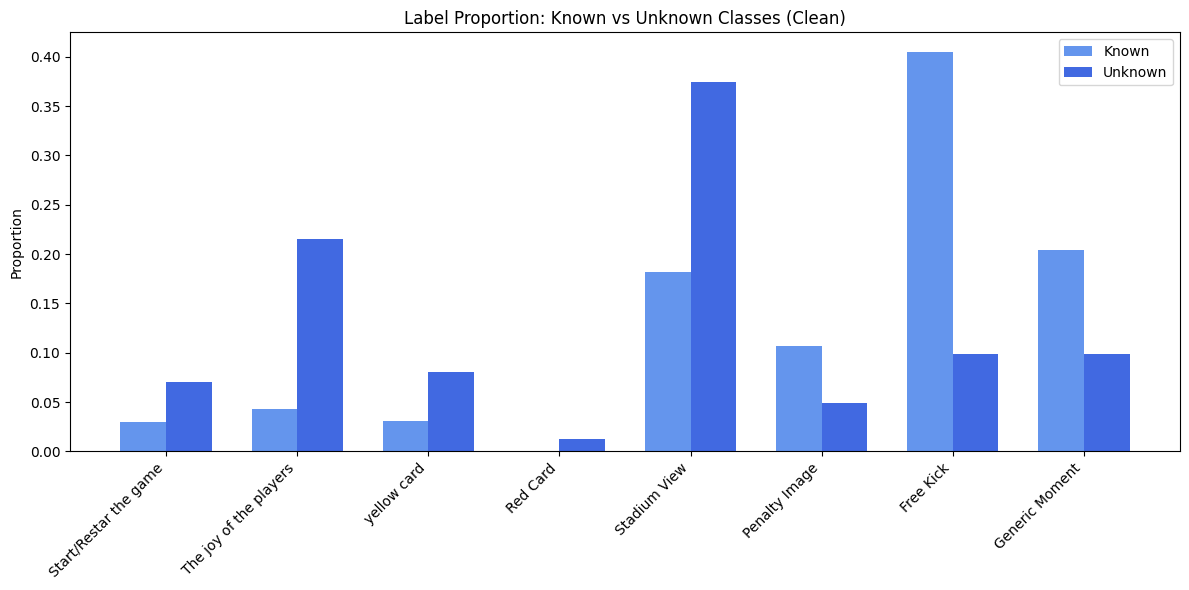

In [ ]:
labels = comparison.index
x = np.arange(len(labels))  
width = 0.35 

fig, ax = plt.subplots(figsize=(12, 6))
bars1 = ax.bar(x - width/2, comparison['Known'], width, label='Known', color = 'cornflowerblue')
bars2 = ax.bar(x + width/2, comparison['Unknown'], width, label='Unknown', color = 'royalblue')

ax.set_ylabel('Proportion')
ax.set_title('Label Proportion: Known vs Unknown Classes (Clean)')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.legend()
plt.tight_layout()
plt.show()


Repeat for noisy data:

                           Known   Unknown
Start/Restar the game   0.031849  0.070130
The joy of the players  0.076126  0.215584
yellow card             0.042724  0.080519
Red Card                0.002848  0.012987
Stadium View            0.290005  0.374026
Penalty Image           0.077162  0.049351
Free Kick               0.288452  0.098701
Generic Moment          0.190834  0.098701


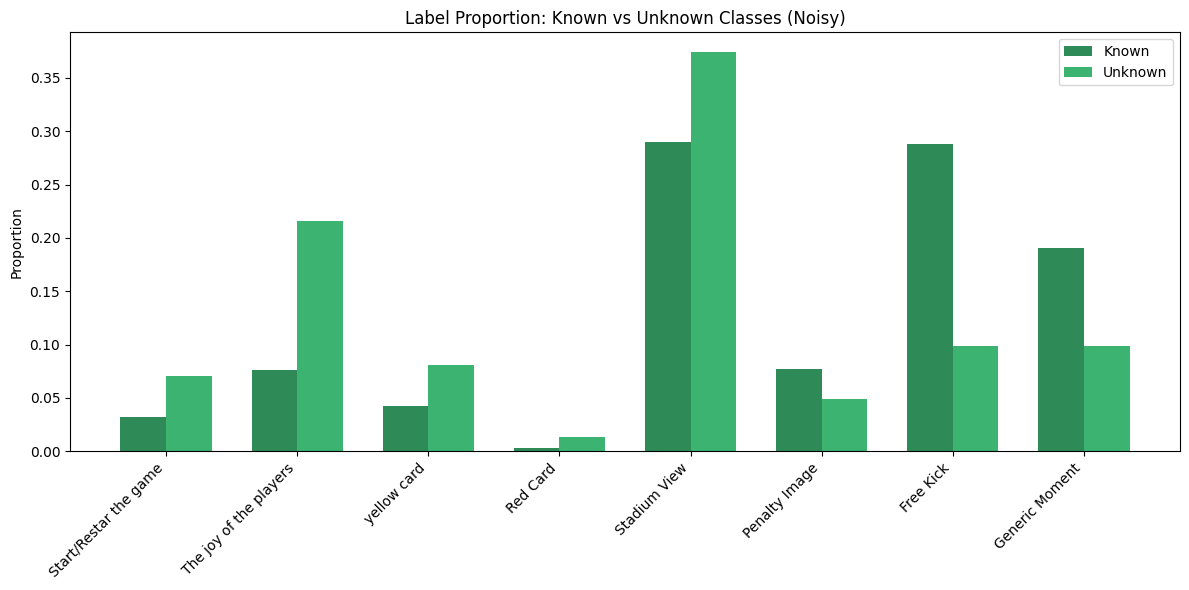

In [ ]:
class_counts = df_noisy['label'].value_counts()
valid_classes = class_counts[class_counts >= 100].index
df_filtered = df_noisy[df_noisy['label'].isin(valid_classes)]

df_filtered['image_id'] = df_filtered['image_path'].str.extract(r'(\d+)').astype(int)

merged = pd.merge(df_filtered, selected_labels, on='image_id', how='inner')

known = merged[merged['label'] != 'unknown']
unknown = merged[merged['label'] == 'unknown']

label_columns = selected_labels.columns.drop('image_id')
known_props = known[label_columns].mean()
unknown_props = unknown[label_columns].mean()

comparison = pd.DataFrame({
    'Known': known_props,
    'Unknown': unknown_props
})

print(comparison)

labels = comparison.index
x = np.arange(len(labels)) 
width = 0.35  

fig, ax = plt.subplots(figsize=(12, 6))
bars1 = ax.bar(x - width/2, comparison['Known'], width, label='Known', color = 'seagreen')
bars2 = ax.bar(x + width/2, comparison['Unknown'], width, label='Unknown', color = 'mediumseagreen')

ax.set_ylabel('Proportion')
ax.set_title('Label Proportion: Known vs Unknown Classes (Noisy)')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.legend()
plt.tight_layout()
plt.show()

Disribution is pretty similar so we don't see issues from here.

## TEST

In [ ]:
import math
import os

In [7]:
class_counts = df['label'].value_counts()
valid_classes = class_counts[class_counts >= 100].index
df_filtered = df[(df['label'].isin(valid_classes)) & (df['label'] != 'unknown')]
print(f'Valid classes are: {valid_classes}')

Valid classes are: Index(['unknown', 'tun-cpv', 'rou-alb', 'irq-uae', 'irn-irq', 'kor-irq',
       'civ-gha'],
      dtype='object', name='label')


In [8]:
def plot_one_image_per_match(df, image_dir, max_matches=20):
    unique_matches = df['label'].unique()[:max_matches]
    n = len(unique_matches)
    
    cols = 3
    rows = math.ceil(n / cols)

    fig, axes = plt.subplots(rows, cols, figsize=(4 * cols, 4 * rows))
    axes = axes.flatten()

    for i, match in enumerate(unique_matches):
        row = df[df['label'] == match].iloc[0]
        img_path = os.path.join(image_dir, row['image_path'])
        image = Image.open(img_path).convert('RGB')

        axes[i].imshow(image)
        axes[i].set_title(match)
        axes[i].axis('off')

    # Hide unused axes
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

civ-gha  irn-irq irq-uae kor-irq  rou-alb tun-cpv

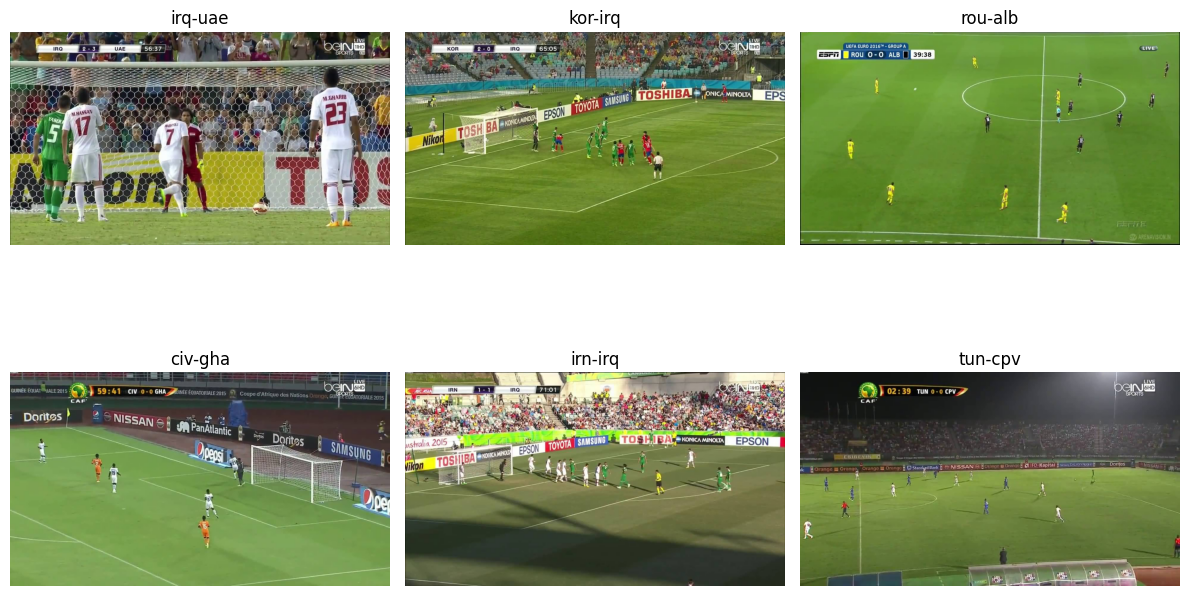

In [72]:
plot_one_image_per_match(df_filtered, 'data/selected_images')

Found 6 unique matches: irq-uae, kor-irq, rou-alb, civ-gha, irn-irq, tun-cpv


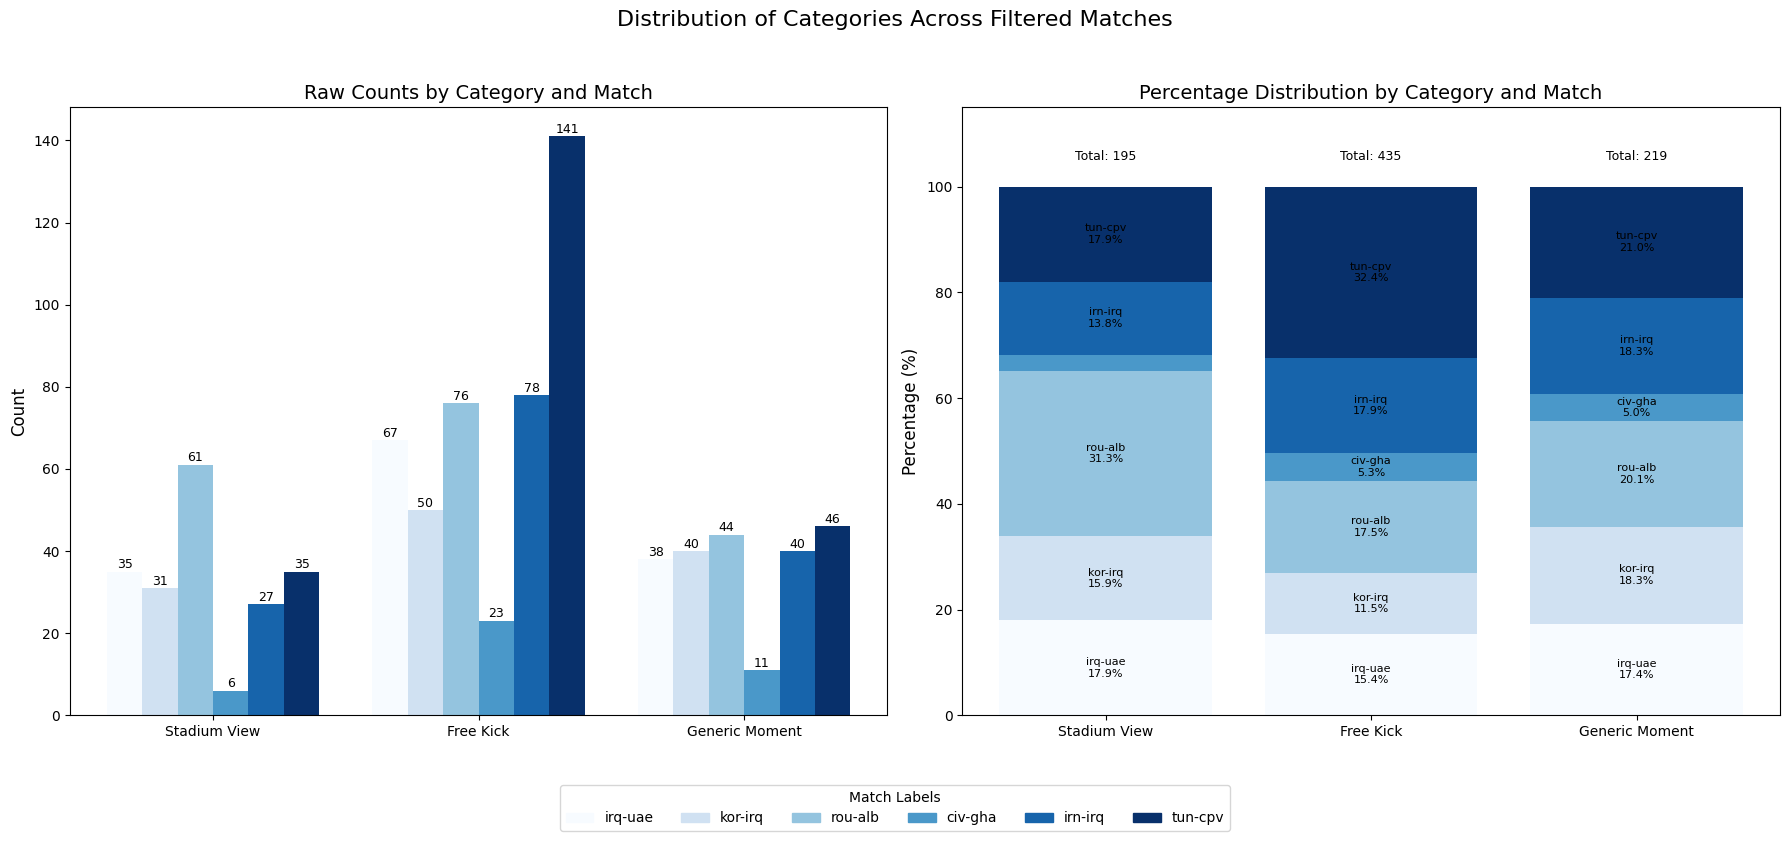


Detailed summary:

Stadium View: Total count = 195
  - irq-uae: 35 occurrence(s) (17.9%)
  - kor-irq: 31 occurrence(s) (15.9%)
  - rou-alb: 61 occurrence(s) (31.3%)
  - civ-gha: 6 occurrence(s) (3.1%)
  - irn-irq: 27 occurrence(s) (13.8%)
  - tun-cpv: 35 occurrence(s) (17.9%)

Free Kick: Total count = 435
  - irq-uae: 67 occurrence(s) (15.4%)
  - kor-irq: 50 occurrence(s) (11.5%)
  - rou-alb: 76 occurrence(s) (17.5%)
  - civ-gha: 23 occurrence(s) (5.3%)
  - irn-irq: 78 occurrence(s) (17.9%)
  - tun-cpv: 141 occurrence(s) (32.4%)

Generic Moment: Total count = 219
  - irq-uae: 38 occurrence(s) (17.4%)
  - kor-irq: 40 occurrence(s) (18.3%)
  - rou-alb: 44 occurrence(s) (20.1%)
  - civ-gha: 11 occurrence(s) (5.0%)
  - irn-irq: 40 occurrence(s) (18.3%)
  - tun-cpv: 46 occurrence(s) (21.0%)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches

filtered_image_paths = df_filtered['image_path'].tolist()
selected = pd.read_csv('selected_labels.csv')

filtered_df = selected[selected['image_path'].isin(filtered_image_paths)]

categories = ['Stadium View', 'Free Kick', 'Generic Moment']

unique_matches = filtered_df['label'].unique()
print(f"Found {len(unique_matches)} unique matches: {', '.join(unique_matches)}")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

colormap_name = 'Blues'  
colormap = plt.cm.get_cmap(colormap_name, len(unique_matches))

match_colors = {}
for i, match in enumerate(unique_matches):
    match_colors[match] = colormap(i)

x = np.arange(len(categories))
bar_width = 0.8 / len(unique_matches) if len(unique_matches) > 0 else 0.8

for i, match in enumerate(unique_matches):
    match_df = filtered_df[filtered_df['label'] == match]
    counts = [match_df[cat].sum() for cat in categories]
    
    bar_position = x - bar_width * (len(unique_matches) - 1)/2 + i * bar_width
    
    bars = ax1.bar(bar_position, counts, width=bar_width, label=match, color=match_colors[match])
    
    for bar, count in zip(bars, counts):
        if count > 0: 
            height = bar.get_height()
            ax1.text(bar.get_x() + bar.get_width()/2, height + 0.1, 
                     str(count), ha='center', va='bottom', fontsize=9)

ax1.set_ylabel('Count', fontsize=12)
ax1.set_title('Raw Counts by Category and Match', fontsize=14)
ax1.set_xticks(x)
ax1.set_xticklabels(categories)

category_totals = {cat: filtered_df[cat].sum() for cat in categories}

bottoms = {cat: 0 for cat in categories}

for match in unique_matches:
    match_df = filtered_df[filtered_df['label'] == match]
    
    percentages = []
    for cat in categories:
        if category_totals[cat] > 0:
            pct = (match_df[cat].sum() / category_totals[cat]) * 100
        else:
            pct = 0
        percentages.append(pct)
    
    bars = ax2.bar(categories, percentages, bottom=[bottoms[cat] for cat in categories], 
                   color=match_colors[match], label=match)
    
    for i, cat in enumerate(categories):
        if percentages[i] > 5: 
            ax2.text(i, bottoms[cat] + percentages[i]/2, f"{match}\n{percentages[i]:.1f}%", 
                     ha='center', va='center', fontsize=8)
        bottoms[cat] += percentages[i]

for i, cat in enumerate(categories):
    if category_totals[cat] > 0:
        ax2.text(i, 105, f"Total: {category_totals[cat]}", ha='center', fontsize=9)

ax2.set_ylabel('Percentage (%)', fontsize=12)
ax2.set_title('Percentage Distribution by Category and Match', fontsize=14)
ax2.set_ylim(0, 115) 

legend_patches = [mpatches.Patch(color=match_colors[match], label=f"{match}") 
                 for match in unique_matches]
fig.legend(handles=legend_patches, title="Match Labels", 
           loc='upper center', bbox_to_anchor=(0.5, 0.02), ncol=len(unique_matches))

plt.suptitle('Distribution of Categories Across Filtered Matches', fontsize=16, y=0.98)
plt.tight_layout(rect=[0, 0.05, 1, 0.95])
plt.show()
